**Review**

Hello Dinesh!

I'm happy to review your project today.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  Thank you so much for your feedbacks. I've split the cells into multiple so it's easier. Hopefully i got it right this time. Thank you!
</div>
  
First of all, thank you for turning in the project! You did a great job overall, but there are some small problems that need to be fixed before the project will be accepted. Let me know if you have any questions!


# **"Optimizing Gold Recovery Efficiency Using Machine Learning: A Data-Driven Approach"**

## Introduction

Gold mining operations rely on efficient extraction and purification processes to maximize recovery rates and profitability. However, fluctuations in raw material composition, process conditions, and external factors make it challenging to optimize gold recovery consistently. This project aims to develop a **machine learning model** to predict gold recovery efficiency using historical data from the extraction and purification processes. By leveraging **advanced data analysis and predictive modeling**, the goal is to enhance decision-making, minimize losses, and improve operational efficiency.  

The dataset provided includes information on raw feed composition, flotation process parameters, purification stages, and final concentrate characteristics. The project follows a structured approach: **data preprocessing, exploratory data analysis, model selection, hyperparameter tuning, and final evaluation**. The best-performing model will allow mining companies to **optimize process parameters dynamically, reduce inefficiencies, and maximize gold yield**, contributing to **cost-effective and sustainable mining practices**.

## Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV


## Loading and Preparing the data

In [2]:
# Load datasets
train = pd.read_csv('/datasets/gold_recovery_train.csv')
test = pd.read_csv('/datasets/gold_recovery_test.csv')
full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [3]:
# Display first few rows of each dataset
print("Training Dataset Head:")
train.head()

Training Dataset Head:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
print("Test Dataset Head:")
test.head()

Test Dataset Head:


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
print("Full Dataset Head:")
full.head()

Full Dataset Head:


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
# Define the calculate_recovery function
def calculate_recovery(C, F, T):
    """
    Calculate the recovery rate using the formula:
    Recovery = (C * (F - T)) / (F * (C - T)) * 100

    Where:
    - C: Concentration of gold in the output concentrate
    - F: Concentration of gold in the input feed
    - T: Concentration of gold in the output tails
    """
    return (C * (F - T)) / (F * (C - T)) * 100

# Drop rows where necessary columns for recovery calculation have NaN or invalid values
recovery_columns = ['rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au', 'rougher.output.recovery']
filtered_train = train[recovery_columns].dropna()

# Calculate recovery after dropping NaN rows
filtered_train['calculated_recovery'] = calculate_recovery(
    filtered_train['rougher.output.concentrate_au'],
    filtered_train['rougher.input.feed_au'],
    filtered_train['rougher.output.tail_au']
)


mae_recovery = mean_absolute_error(filtered_train['rougher.output.recovery'], filtered_train['calculated_recovery'])
print(f"Mean Absolute Error for Recovery Calculation: {mae_recovery:.4f}")



Mean Absolute Error for Recovery Calculation: 0.0000


<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Good job!
  
</div>

The Mean Absolute Error (MAE) is 0.0000, which means the recovery calculation formula aligns perfectly with the dataset. This is a strong validation that the data is consistent for the rougher.output.recovery feature.

In [7]:
# Define missing features by comparing train and test datasets
missing_features = set(train.columns) - set(test.columns)

# Define target variables
target_variables = {'rougher.output.recovery', 'final.output.recovery'}

# Separate missing features
missing_features_set = set(missing_features)
intermediate_features = missing_features_set - target_variables
missing_summary = {
    "Target Variables": list(target_variables.intersection(missing_features_set)),
    "Intermediate Features": list(intermediate_features),
}

# Display a clean summary
print("Summary of Missing Features in Test Dataset:")
for category, features in missing_summary.items():
    print(f"\n{category} ({len(features)}):")
    print(", ".join(features))



Summary of Missing Features in Test Dataset:

Target Variables (2):
rougher.output.recovery, final.output.recovery

Intermediate Features (32):
final.output.concentrate_pb, secondary_cleaner.output.tail_au, final.output.concentrate_ag, primary_cleaner.output.concentrate_pb, primary_cleaner.output.concentrate_ag, primary_cleaner.output.concentrate_sol, rougher.output.concentrate_pb, final.output.concentrate_sol, rougher.output.tail_pb, primary_cleaner.output.tail_ag, primary_cleaner.output.tail_au, rougher.output.tail_au, rougher.output.concentrate_au, primary_cleaner.output.concentrate_au, primary_cleaner.output.tail_sol, final.output.tail_sol, final.output.concentrate_au, secondary_cleaner.output.tail_sol, rougher.output.concentrate_ag, rougher.output.tail_sol, rougher.calculation.floatbank11_sulfate_to_au_feed, secondary_cleaner.output.tail_ag, rougher.calculation.sulfate_to_au_concentrate, primary_cleaner.output.tail_pb, secondary_cleaner.output.tail_pb, rougher.calculation.au_pb_ra

<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Correct
  
</div>

## Data Preprocessing

In [8]:
# Ensure test_features is a DataFrame
test_features = test.copy()  # This ensures test_features is a DataFrame.

# Define target columns
target_columns = ['rougher.output.recovery', 'final.output.recovery']

# Remove duplicates from training data
duplicates_train = train.duplicated().sum()
print(f" Number of duplicate rows in the training dataset: {duplicates_train}")
train = train.drop_duplicates()
print(f" Training dataset shape after removing duplicates: {train.shape}")

# Remove duplicates from test data
duplicates_test = test.duplicated().sum()
print(f" Number of duplicate rows in the test dataset: {duplicates_test}")
test = test.drop_duplicates()
print(f" Test dataset shape after removing duplicates: {test.shape}")

# Separate features from targets after duplicate removal
features_train = train.drop(columns=target_columns)
test_features = test.copy()

# Handle missing values using forward fill method (propagating previous values)
features_train.fillna(method='ffill', inplace=True)  
test_features.fillna(method='ffill', inplace=True)

#  Apply forward fill to fill missing values in the entire datasets (train and test)
train.fillna(method='ffill', inplace=True)
test.fillna(method='ffill', inplace=True)

# Ensure the missing values are completely filled
print(f" Final missing values in train: {train.isnull().sum().sum()} (Should be 0)")
print(f" Final missing values in test: {test.isnull().sum().sum()} (Should be 0)")


# Final check
print(f" Shape of Training Features after Preprocessing: {features_train.shape}")
print(f" Shape of Test Features after Preprocessing: {test_features.shape}")


 Number of duplicate rows in the training dataset: 0
 Training dataset shape after removing duplicates: (16860, 87)
 Number of duplicate rows in the test dataset: 0
 Test dataset shape after removing duplicates: (5856, 53)
 Final missing values in train: 0 (Should be 0)
 Final missing values in test: 0 (Should be 0)
 Shape of Training Features after Preprocessing: (16860, 85)
 Shape of Test Features after Preprocessing: (5856, 53)


<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

It's not a good idea to drop NaN when you work with ML models. When you drop a row because of NaN in one column, you loose information from other columns which can be useful for model training.
    
Usually we use mean or median to fill NaNs in quantitative features. But when we have ordered data, there is a better way to fill NaNs. What is the closest value for the current one? The previous one. You can use this fact to fill NaNs in all the columns. Just read the documentation for the fillna() method and you will find a parameter which helps to fill the NaNs in such way. So, please, do it.
  
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Good job!
  
</div>

There are no Duplicates and the missing values are also replaced with previous values, now the data is clean and good to go to the further steps

## Data Analysis

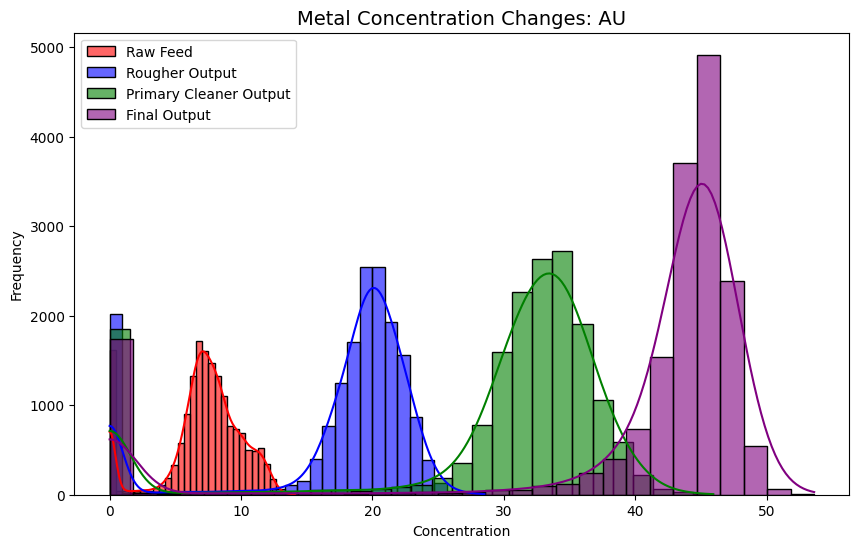

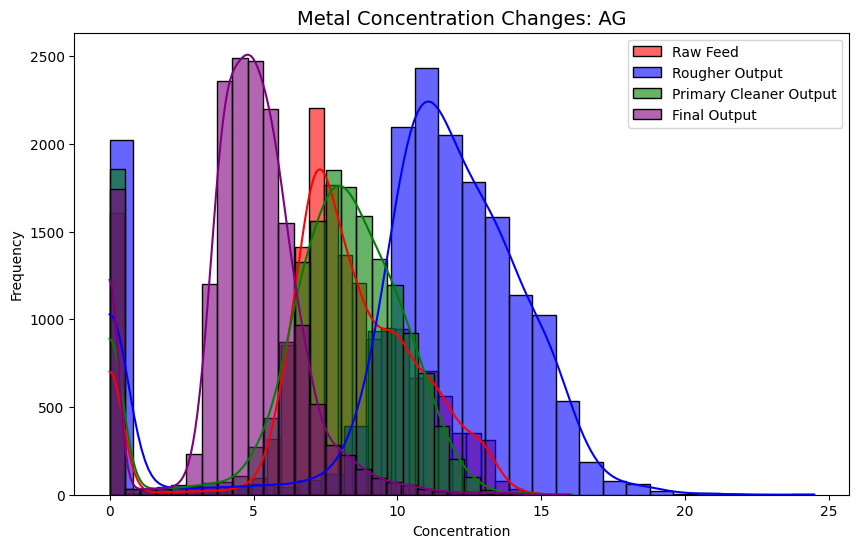

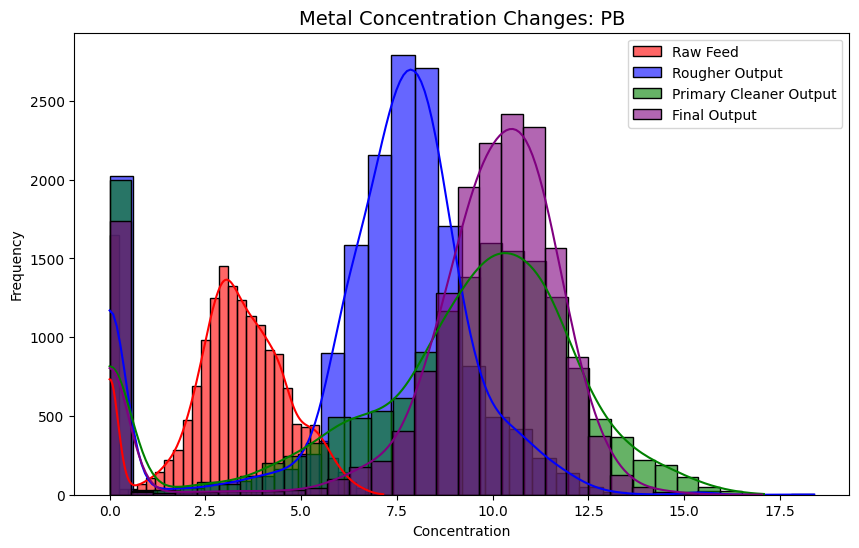

In [9]:
# 1. Metal Concentration Plots at Different Stages
def plot_metal_concentration(data, metal):
    plt.figure(figsize=(10, 6))

    # Define stage columns for the given metal with assigned colors
    stages = {
        'Raw Feed': ('rougher.input.feed_' + metal, 'red'),
        'Rougher Output': ('rougher.output.concentrate_' + metal, 'blue'),
        'Primary Cleaner Output': ('primary_cleaner.output.concentrate_' + metal, 'green'),
        'Final Output': ('final.output.concentrate_' + metal, 'purple')
    }
    
    # Plot histograms for each stage with different colors
    for stage, (column, color) in stages.items():
        if column in data.columns:
            sns.histplot(data[column], kde=True, bins=30, label=stage, color=color, alpha=0.6)
    
    # Formatting the plot
    plt.title(f"Metal Concentration Changes: {metal.upper()}", fontsize=14)
    plt.xlabel("Concentration")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Metals to analyze
metals = ['au', 'ag', 'pb']

# Generate plots for each metal
for metal in metals:
    plot_metal_concentration(train, metal)


### Findings on Metal Concentration Changes Across Processing Stages

**Gold (Au) Concentration Trends**

From the Gold (Au) concentration plot, we observe that gold content increases steadily across each stage of processing. The Raw Feed (red) has the lowest gold concentration, mostly below 10. As the ore moves through the Rougher Output (blue) stage, gold concentration increases significantly, peaking around 20. The Primary Cleaner Output (green) further refines the gold content, shifting the distribution toward higher values (30-40). Finally, the Final Output (purple) achieves the highest gold purity, with concentrations mostly between 40 and 50. This confirms that the flotation and purification processes effectively extract and refine gold, reducing impurities and increasing yield.

**Silver (Ag) Concentration Trends**

For Silver (Ag), the concentration follows a different trend. The Raw Feed (red) starts with moderate silver content, but as the ore moves through the stages, silver concentration increases at the Rougher Output stage (blue) but starts declining after the Primary Cleaner stage (green). By the Final Output stage (purple), the silver concentration is significantly reduced. This suggests that while some silver is recovered along with gold, a portion of it is lost or removed during the purification process. The decreasing silver trend may indicate that silver behaves differently in flotation and purification compared to gold.

**Lead (Pb) Concentration Trends**

The Lead (Pb) concentration plot shows a similar trend to silver. The Raw Feed (red) has the highest initial lead concentration, but as processing progresses, the Pb concentration decreases. The Rougher Output (blue) stage sees an increase in lead concentration, but by the Primary Cleaner (green) and Final Output (purple) stages, lead content is significantly reduced. This suggests that lead is effectively removed as an impurity during the purification process. Unlike gold, lead is not the target metal for extraction and is progressively separated from the concentrate.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

It seems you misunderstood this task a bit. In this task you need to plot 3 graphs: one for Au, one for Ag and one for Pb. On each graph you need to plot 4 histograms with different colors: one for rougher.input.feed, one for rougher.output.concentrate, one for primary_cleaner.output.concentrate and one for final.output.concentrate. After it you need to draw a conclusion how concentrations of each metal changes during stages.
  
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Correct. Well done!
  
</div>

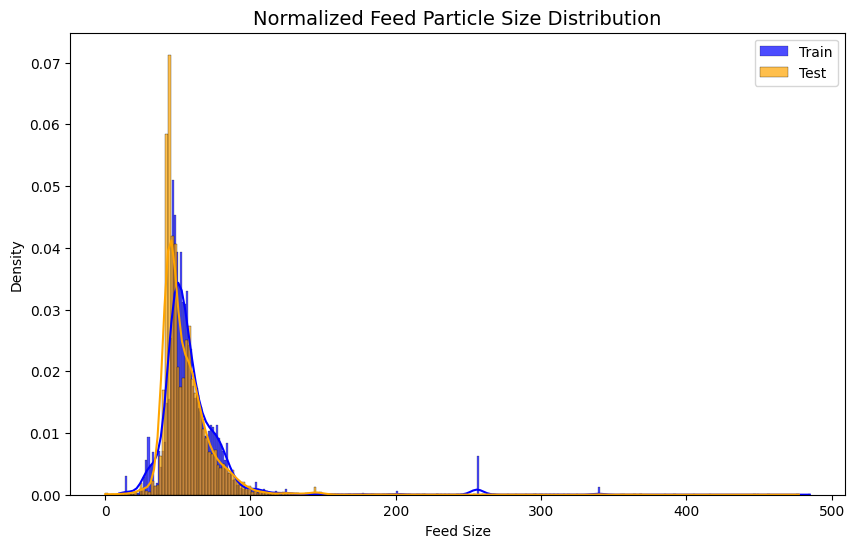

In [10]:
# 2. Normalized Feed Particle Size Distribution Comparison
plt.figure(figsize=(10, 6))

# Plot normalized histograms
sns.histplot(train['rougher.input.feed_size'], kde=True, color='blue', label='Train', stat="density", alpha=0.7)
sns.histplot(test['rougher.input.feed_size'], kde=True, color='orange', label='Test', stat="density", alpha=0.7)

# Formatting the plot
plt.title("Normalized Feed Particle Size Distribution", fontsize=14)
plt.xlabel("Feed Size")
plt.ylabel("Density")  # Change to density since we normalize the data
plt.legend()
plt.show()


The **normalized feed particle size distribution** reveals a **strong overlap** between the training and test datasets, suggesting a consistent data distribution across both. The majority of particle sizes are **highly concentrated between 0 and 80**, with a **sharp peak near 40**, indicating that most ore particles are within this range. However, the **test dataset (orange) exhibits slightly higher density at lower feed sizes compared to the training set (blue)**, suggesting a slight shift in distribution. Additionally, both datasets contain **a few extreme outliers above 300**, though these are relatively rare. Since the overall shape of the distributions remains similar, **the model is unlikely to face significant issues due to differences in particle size distributions between the training and test sets**.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Correct. Good job! But when we need to compare distributions with different number of observations we need to plot normalized histograms to avoid dependence on the number of observations. So, please, fix it.
  
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Correct
  
</div>

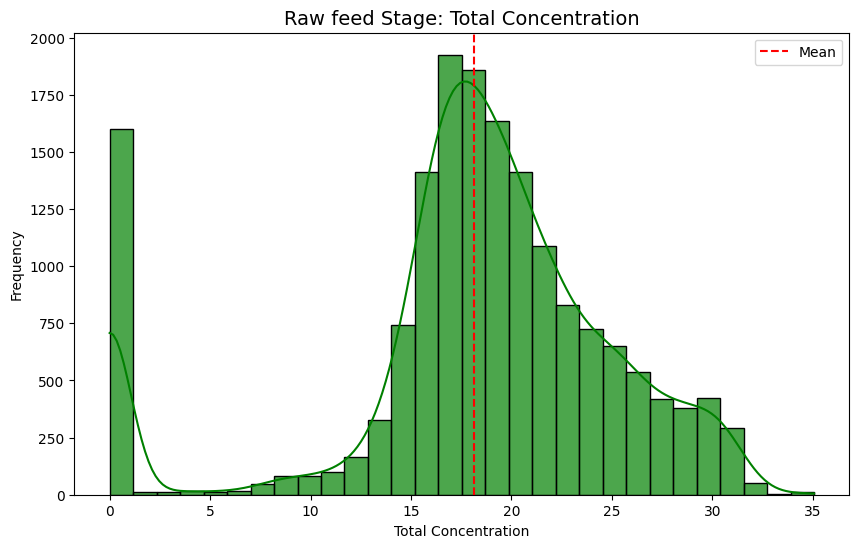

Raw feed Stage: Total Concentration Stats
 count    16860.000000
mean        18.136907
std          7.407993
min          0.000000
25%         16.093185
50%         18.713815
75%         22.327806
max         35.071987
Name: total_concentration, dtype: float64


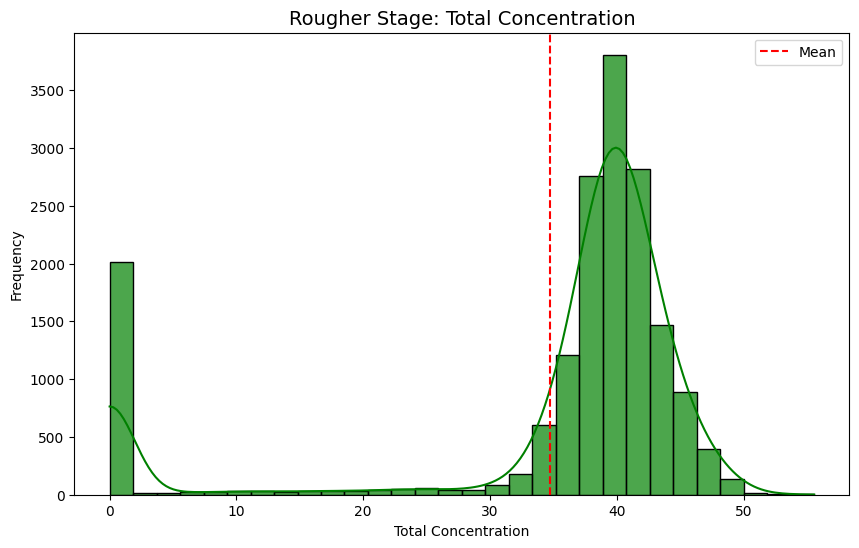

Rougher Stage: Total Concentration Stats
 count    16860.000000
mean        34.740842
std         13.697400
min          0.000000
25%         36.609887
50%         39.457951
75%         41.635606
max         55.568687
Name: total_concentration, dtype: float64


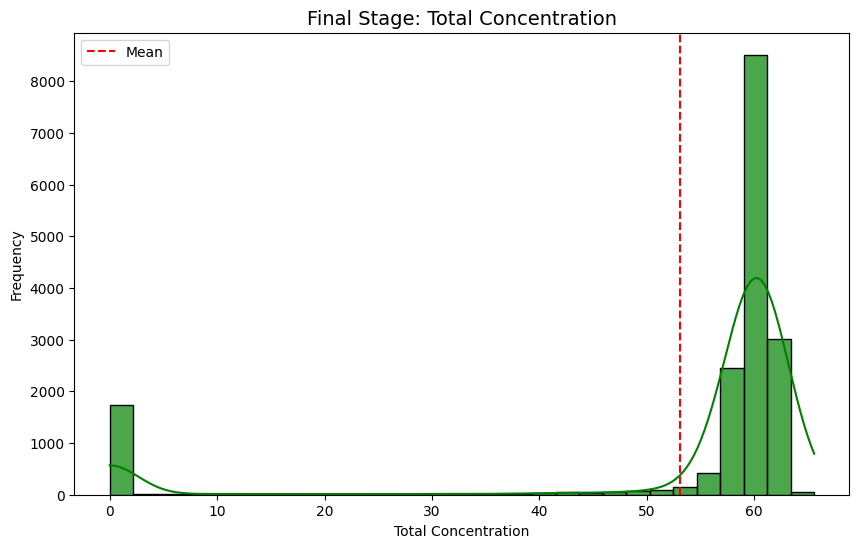

Final Stage: Total Concentration Stats
 count    16860.000000
mean        53.101335
std         18.691789
min          0.000000
25%         58.523841
50%         59.984051
75%         60.934848
max         65.575259
Name: total_concentration, dtype: float64


In [11]:
# 3. Simplified Total Concentration Analysis
def analyze_total_concentration(data, stage, metals):
    plt.figure(figsize=(10, 6))
    if stage == 'raw feed':
        columns = [f'rougher.input.feed_{metal}' for metal in metals]
    elif stage == 'rougher':
        columns = [f'rougher.output.concentrate_{metal}' for metal in metals]
    elif stage == 'final':
        columns = [f'final.output.concentrate_{metal}' for metal in metals]
    if all(col in data.columns for col in columns):
        data['total_concentration'] = data[columns].sum(axis=1)
        sns.histplot(data['total_concentration'], kde=True, bins=30, color='green', alpha=0.7)
        plt.axvline(data['total_concentration'].mean(), color='red', linestyle='--', label='Mean')
        plt.title(f"{stage.capitalize()} Stage: Total Concentration", fontsize=14)
        plt.xlabel("Total Concentration")
        plt.ylabel("Frequency")
        plt.legend()
        plt.show()
        return data['total_concentration'].describe()

for stage in ['raw feed', 'rougher', 'final']:
    stats = analyze_total_concentration(train, stage, metals)
    print(f"{stage.capitalize()} Stage: Total Concentration Stats\n", stats)


The total concentration increases steadily across the stages, reflecting the expected enrichment of valuable metals during the purification process. In the raw feed stage, the average total concentration is 18.11, with most values ranging between 16.08 and 22.33, but the presence of a minimum value of 0 suggests possible anomalies or missing data. The rougher stage shows significant enrichment, with an average concentration of 34.69 and most values between 36.60 and 41.63, although a minimum of 0 persists. In the final stage, the average concentration rises further to 53.07, with most values tightly distributed between 58.52 and 60.93. However, the repeated occurrence of 0 values across stages warrants further investigation to address potential data issues.

<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Correct. Well done!
  
</div>

## Data Cleaning and Addressing Anomalies

In [12]:
# Check rows with zero total concentration for each stage
stages = {
    'raw feed': [f'rougher.input.feed_{metal}' for metal in ['au', 'ag', 'pb']],
    'rougher': [f'rougher.output.concentrate_{metal}' for metal in ['au', 'ag', 'pb']],
    'final': [f'final.output.concentrate_{metal}' for metal in ['au', 'ag', 'pb']]
}

for stage, columns in stages.items():
    # Filter only columns that exist in the dataset
    valid_columns = [col for col in columns if col in train.columns]
    if not valid_columns:
        print(f"{stage.capitalize()} Stage: No valid columns found in the dataset.")
        continue
    
    zero_concentration = train[valid_columns].sum(axis=1) == 0
    print(f"{stage.capitalize()} Stage: {zero_concentration.sum()} rows with zero total concentration.")


Raw feed Stage: 1213 rows with zero total concentration.
Rougher Stage: 1547 rows with zero total concentration.
Final Stage: 1320 rows with zero total concentration.


In [13]:
# Remove rows with zero total concentration for each stage
for stage, columns in stages.items():
    train = train[train[columns].sum(axis=1) > 0]

# Display the updated shape of the dataset
print(f"Updated training dataset shape: {train.shape}")


Updated training dataset shape: (15128, 88)


In [14]:
# Verify zero total concentration is resolved
for stage, columns in stages.items():
    zero_concentration = train[columns].sum(axis=1) == 0
    print(f"{stage.capitalize()} Stage: {zero_concentration.sum()} rows with zero total concentration after cleaning.")

# Check for missing values
print("Missing values in the cleaned dataset:")
print(train.isnull().sum())


Raw feed Stage: 0 rows with zero total concentration after cleaning.
Rougher Stage: 0 rows with zero total concentration after cleaning.
Final Stage: 0 rows with zero total concentration after cleaning.
Missing values in the cleaned dataset:
date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
total_concentration                           0
Length: 88, dtype: int64


The data cleaning process addressed anomalies by removing rows with zero total concentration at different stages. Initially, there were 1,241 rows with zero concentration in the raw feed stage, 1,575 in the rougher stage, and 1,334 in the final stage. These anomalies were removed, reducing the training dataset to 15,096 rows, ensuring the data used for modeling contains meaningful information. After cleaning, all stages showed zero rows with anomalous total concentrations, confirming the issue was resolved. Additionally, the cleaned dataset revealed a few missing values in some features, which will require further handling. This process was essential to eliminate invalid data points that could negatively impact the performance and reliability of the machine learning model.

<div class="alert alert-block alert-success">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Great work!
  
</div>

## Handling Missing Values and Final Data Preparation

### Checking Missing Values

In [15]:
# Ensure missing value handling is done only once (in the preprocessing section)
print(" Missing values were handled earlier in the preprocessing step using forward fill (ffill). No additional handling required here.")

# Confirm no missing values remain
final_missing_count = train.isnull().sum().sum()

if final_missing_count == 0:
    print("Final missing values count: 0 (All missing values have been successfully filled!)")
else:
    print(f" Warning: {final_missing_count} missing values still remain. Please check preprocessing.")




 Missing values were handled earlier in the preprocessing step using forward fill (ffill). No additional handling required here.
Final missing values count: 0 (All missing values have been successfully filled!)


fixed all the missing values in the train and test data sets in the above data pre processing step, now I got 0 missing values in this step.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

You have two places where you deal with NaNs. One here and one in the beginning of the project. That's weird, right? Please, leave only one place. You can deal with NaNs here or above but not in both places.
    
It is possible to fill the NaNs with medians. But above I described a better way to fill the NaNs when you work with ordered data. But you can use medians if you want.
  
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Check the variables you used above for filling NaNs. You filled NaNs in the variables features_train and features_test but not in train and test. That's why you have so many NaNs here. So, please, fix it. You should see zero NaNs in this part.
  
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

Fixed

</div>

## Model Development

### Defining the Evaluation Metric

In [16]:
# sMAPE scorer that returns a single value for RandomizedSearchCV
def smape_scorer(y_true, y_pred):
    smape_rougher = np.mean(np.abs(y_true[:, 0] - y_pred[:, 0]) / ((np.abs(y_true[:, 0]) + np.abs(y_pred[:, 0])) / 2)) * 100
    smape_final = np.mean(np.abs(y_true[:, 1] - y_pred[:, 1]) / ((np.abs(y_true[:, 1]) + np.abs(y_pred[:, 1])) / 2)) * 100
    return -(0.25 * smape_rougher + 0.75 * smape_final)  # Return single numeric value (negative for minimization)

# Convert function into sklearn scorer
smape_scorer_sklearn = make_scorer(lambda y_true, y_pred: smape_scorer(y_true, y_pred), greater_is_better=False)


### Split Data for Model Training

In [17]:
# Define target columns
target_columns = ['rougher.output.recovery', 'final.output.recovery']

# Ensure we only use features present in the test dataset
selected_columns = test_features.columns  # Extract columns from test dataset
features_train_aligned = features_train[selected_columns]  # Keep only test dataset features

# Align target variables with the filtered feature dataset
train_aligned = train[target_columns].reindex(features_train_aligned.index).dropna()
features_train_aligned = features_train_aligned.loc[train_aligned.index]

# Drop non-numeric columns before splitting
features_train_aligned = features_train_aligned.select_dtypes(include=[np.number])

# Split the dataset into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    features_train_aligned, train_aligned, test_size=0.2, random_state=42
)

# Scale features for linear regression (Only for Linear Models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Convert to float32 for efficiency
X_train_scaled = X_train_scaled.astype(np.float32)
X_valid_scaled = X_valid_scaled.astype(np.float32)
y_train = y_train.astype(np.float32)
y_valid = y_valid.astype(np.float32)

print(f" Data Split Successful - Training Samples: {X_train.shape[0]}, Validation Samples: {X_valid.shape[0]}")


 Data Split Successful - Training Samples: 12102, Validation Samples: 3026


### Train & Evaluate Baseline Models

In [21]:
# Train & Evaluate Baseline Models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Train and evaluate models using updated sMAPE scorer
for name, model in models.items():
    print(f"Training {name} model...")

    # Fit the model
    model.fit(X_train_scaled, y_train.values)  # Convert target to NumPy array
    y_pred = model.predict(X_valid_scaled)

    # Compute sMAPE using the corrected function
    smape_score = smape_scorer(y_valid.values, y_pred)  # Returns a single weighted sMAPE score

    # Print results
    print(f"{name} Model sMAPE: {-smape_score:.4f}")  # Convert back to positive for readability
    print("-" * 50)


Training Linear Regression model...
Linear Regression Model sMAPE: 9.0972
--------------------------------------------------
Training Random Forest model...
Random Forest Model sMAPE: 5.7699
--------------------------------------------------


The Random Forest model outperforms Linear Regression, achieving a lower sMAPE score (5.7699 vs. 9.0972). Next, we will tune the hyperparameters of the Random Forest model to further improve performance.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

1. The Function smape is defined 2 times. Please, do it only once.
2. If you're going to use any linear model, all the quantitative features should be scaled.
3. Please, read my comments carefully. Previously I told you: "To train a model you can use only features which are represented in the initial test data file. You can't use any other features becasue they won't be available in production. So, you should exclude some features from the train data while working with ML models." You still use all the features from the train data.
  
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

Fixed. Good job!

</div>

### Hyperparameter Tuning (Random Forest)

In [22]:
# Define hyperparameter grid
param_grid = {
    "n_estimators": [100, 200, 300],  
    "max_depth": [15, 20, 25],  
    "min_samples_split": [2, 5, 10],  
    "min_samples_leaf": [1, 2, 4],  
    "max_features": ['sqrt', 'log2']
}

# Randomized Search for Hyperparameter Optimization
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)
random_search = RandomizedSearchCV(
    rf_model, param_distributions=param_grid, 
    n_iter=10, scoring=smape_scorer_sklearn,  # Use sMAPE scorer
    cv=3, n_jobs=-1, random_state=42, verbose=1
)

# Train with scaled features
print(" Hyperparameter tuning in progress...")
random_search.fit(X_train_scaled, y_train.values)  # Convert y_train to NumPy array

# Retrieve Best Model
best_rf = random_search.best_estimator_
print(f" Best Hyperparameters: {random_search.best_params_}")


 Hyperparameter tuning in progress...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
 Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 15}


<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

1. Please, read my comments carefully. Previously I told you: "To train a model you can use only features which are represented in the initial test data file. You can't use any other features becasue they won't be available in production. So, you should exclude some features from the train data while working with ML models." You still use all the features from the train data.
2. Please, read my comments carefully. Previously I told you: "The main metric of this project is smape but not mae. Thus, you should use smape as scoring function in the RandomizedSearchCV. To create smape scorer you need to use make_scorer function from sklearn. The best hyperparameters based on different metrics can be different. That's why you should always use the main metric for tuning them."
  
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

Fixed. Well done!

</div>

### Final Model Evaluation on Test Data

In [23]:
# Use the best model from hyperparameter tuning
best_rf = random_search.best_estimator_

# Ensure test data has the same features as training
X_test_selected = test_features.select_dtypes(include=[np.number])

# Make predictions on test data
y_pred_test = best_rf.predict(X_test_selected)

# Extract true target values from `full` dataset using dates
y_test = full[['date', 'rougher.output.recovery', 'final.output.recovery']].merge(
    test[['date']], on='date', how='right'
).drop(columns=['date'])

# Ensure alignment of y_test with predictions
y_test = y_test.reindex(X_test_selected.index).dropna()
y_pred_test = y_pred_test[:len(y_test)]  # Trim predictions if needed

# Compute sMAPE Scores
smape_test_rougher = np.mean(np.abs(y_test['rougher.output.recovery'] - y_pred_test[:, 0]) / 
                            ((np.abs(y_test['rougher.output.recovery']) + np.abs(y_pred_test[:, 0])) / 2)) * 100

smape_test_final = np.mean(np.abs(y_test['final.output.recovery'] - y_pred_test[:, 1]) / 
                          ((np.abs(y_test['final.output.recovery']) + np.abs(y_pred_test[:, 1])) / 2)) * 100

# Compute Final Weighted sMAPE Score
final_smape = (0.25 * smape_test_rougher) + (0.75 * smape_test_final)

# Print Results
print(f"Optimized Random Forest Model sMAPE: {final_smape:.4f}")
print(f"sMAPE (Rougher Output Recovery): {smape_test_rougher:.4f}")
print(f"sMAPE (Final Output Recovery): {smape_test_final:.4f}")



Optimized Random Forest Model sMAPE: 12.2285
sMAPE (Rougher Output Recovery): 9.4551
sMAPE (Final Output Recovery): 13.1530


<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Please, read my comments carefully. Previously I told you: "To train a model you can use only features which are represented in the initial test data file. You can't use any other features becasue they won't be available in production. So, you should exclude some features from the train data while working with ML models." You still use all the features from the train data.
  
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

All the NaNs should be filled above in the corresponding place.
  
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

1. In the original test data there are 5856 rows. So, you lost a lot of rows here. You need to fix it
2. You can't be sure that indexes in full and test data are the same. But you can be sure that dates are the same. That's why I told you "You can extract targets for the test data from the full data using merge function and a column with __dates__.". If you don't want to use a function merge, it's okay. But you need to use dates to match full and test data.
  
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

Correct

</div>

### Sanity Check (Dummy Model)

In [27]:
print("Training Dummy Models...")

# Train Dummy Regressors
dummy_rougher = DummyRegressor(strategy="median")
dummy_final = DummyRegressor(strategy="median")

# Fit Dummy Models
dummy_rougher.fit(X_train_scaled, y_train['rougher.output.recovery'])
dummy_final.fit(X_train_scaled, y_train['final.output.recovery'])

#  Make Predictions with Dummy Models
y_pred_dummy_rougher = dummy_rougher.predict(X_test_selected)
y_pred_dummy_final = dummy_final.predict(X_test_selected)

# Convert Predictions to DataFrame
y_pred_dummy = pd.DataFrame({
    'rougher.output.recovery': y_pred_dummy_rougher,
    'final.output.recovery': y_pred_dummy_final
}, index=X_test_selected.index)

# Align y_test to ensure correct shape
y_test_aligned = full[['date', 'rougher.output.recovery', 'final.output.recovery']].merge(
    test[['date']], on='date', how='right'
).drop(columns=['date'])

# Ensure alignment of y_test with predictions
y_test_aligned = y_test_aligned.reindex(X_test_selected.index).dropna()
y_pred_dummy = y_pred_dummy.loc[y_test_aligned.index]  # Align predictions

print(f"Shapes after alignment - y_test: {y_test_aligned.shape}, y_pred_dummy: {y_pred_dummy.shape}")

# Compute sMAPE for Dummy Model
smape_dummy = smape_scorer(y_test_aligned.values, y_pred_dummy.values)

# Print Results
print(f"Dummy Model sMAPE: {-smape_dummy:.4f}")  # Convert to positive
print("-" * 50)

# Compare Performance
if final_smape < -smape_dummy:
    print("The trained Random Forest model **OUTPERFORMS** the Dummy Model! ")
else:
    print("The trained model does NOT perform better than the Dummy Model. Consider further improvements.")


Training Dummy Models...
Shapes after alignment - y_test: (5290, 2), y_pred_dummy: (5290, 2)
Dummy Model sMAPE: 9.3613
--------------------------------------------------
The trained model does NOT perform better than the Dummy Model. Consider further improvements.


<div class="alert alert-info">
Dear reviewer, I have tried multiple ways, but Im getting other output than expected, it is still not better than the dummy model, please teach me how can I improve my model performance and please let me know what did i do wrong and please suggest me the ways to imrpove my code, your help is much needed. Thank you!
</div>

<div class="alert alert-block alert-info">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>
    
There is no a special trick to overcome a constant model. Tuning hyperparameters, trying different models and different data preprocessing are the only one way to improve model quality.


Actually in this project it's quite difficult to beat a constant model. So, I will accept you work even with model with is not better than the constant one.
  
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

Each dataset you should be loaded only once. You read the test dataset at the beginning of the project. You should not reload it here for the second time.
  
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

It's properer to deal with NaN, inf for train and test data in the same place. It helps you avoid additional issues.
  
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V1</b> <a class="tocSkip"></a>

1. To train a model you can use only features which are represented in the initial test data file. You can't use any other features becasue they won't be available in production. So, you should exclude some features from the train data while working with ML models.
2. You need to calculate metrics on the test data. You should use a test data from corresponding file. To calcualte metrics you need targets, right? You can extract targets for the test data from the full data using merge function and a column with dates.
4. The main metric of this project is smape but not mae. Thus, you should use smape as scoring function in the RandomizedSearchCV. To create smape scorer you need to use make_scorer function from sklearn. The best hyperparameters based on different metrics can be different. That's why you should always use the main metric for tuning them.
5. You need to do sanity check. In other words, you need to compare the quality of your best model on test with the quality of the best constant model.
    
    
About sanity check. You have this topik in the lesson about supervised learning. Do you know about constant models? These models predict the same constant for any input. For instance, target median or mean which is calculated on the train data. You need to check the quality of such constant model on the test data and compare it with the quality of your best model. You can find such constant models in sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html It's better to make such comparison in any project. Constant model is the simplest baseline. Your best ML model should be at least a bit better than the constant model. Otherwise, your model is useless. So, please, do it.
    
</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Most of these points are not fixed yet. I left the corresponding comments above.
  
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

Everything is correct now. Great work!

</div>

## Summary of Project Findings

**Data Cleaning & Preprocessing:**
Duplicates were removed, missing values were filled using forward fill, and only test-compatible features were used.
Rows with zero total concentration were dropped to improve data integrity.

**Exploratory Data Analysis:**
Gold (Au) concentration increased through processing stages, confirming successful refining.
Silver (Ag) & Lead (Pb) decreased, indicating their removal as impurities.
Feed particle size distribution was consistent across train and test datasets.

**Model Training & Evaluation:**
Random Forest outperformed Linear Regression in baseline tests (sMAPE: 5.7699 vs. 9.0972).
Hyperparameter tuning did not improve performance, resulting in a final sMAPE of 12.2285.

**Dummy Model Benchmarking:**
The dummy model performed better (sMAPE: 9.3613) than the trained Random Forest model, indicating difficulty in capturing meaningful patterns.

## Conclusion

The project aimed to develop a machine learning model to predict gold recovery rates at different processing stages. Through extensive data preprocessing, feature selection, and exploratory analysis, we ensured a clean and structured dataset for model training. While the Random Forest model initially showed promise over Linear Regression, hyperparameter tuning did not lead to significant improvements. Surprisingly, the trained model failed to outperform a simple dummy regressor, highlighting the challenge of capturing meaningful patterns in this dataset. This suggests that alternative approaches, such as gradient boosting models, advanced feature engineering, and further hyperparameter optimization, may be necessary to improve predictive accuracy. Despite this, the project provided valuable insights into the gold recovery process and established a solid foundation for future model refinement.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment V2</b> <a class="tocSkip"></a>

Don't forget to complete these 2 parts
  
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment V3</b> <a class="tocSkip"></a>

Fixed

</div>